Visualisation of loc data

In [1]:
# import libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Analysing Batchsize

In [2]:
#define relevant columns
columns = ['test_accuracy','training_accuracy']

#initialise empty dataframes
accuracy = pd.DataFrame(columns=['Batchsize', 'Training', 'Test'])

bs128 =  []
bs8 = []
bs32 = []
bs512 = []
files= []
folders = []

#Get all folders of Cifar10
for r, d, f in os.walk(os.getcwd()+ "\logs"):
    for folder in d:
        name = str(folder)
        if name.endswith('Cifar10'):     
            folders.append(os.path.join(r, folder))


# go through Cifar10
for fil in folders:
    
    direction = str(fil)
    inhalt = os.listdir(fil) #each file in each folder

    #seperate the csv files according to batch size
    for file in inhalt:
    
        name = str(file)
       
        if ('bs128' in name):
            bs128.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated128 = pd.concat(bs128, ignore_index=True)

        if ('bs8' in name):

            bs8.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated8 = pd.concat(bs8, ignore_index=True)

        if ('bs32' in name):

            bs32.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated32 = pd.concat(bs32, ignore_index=True)

        if ('bs512' in name):

            bs512.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated512 = pd.concat(bs512, ignore_index=True)
        
    
        
        
#add the gained information in the accuracy dataframe        
add8 = pd.DataFrame([[8,df_concatenated8['training_accuracy'].mean(),df_concatenated8['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add8, ignore_index=True)
add32 = pd.DataFrame([[32,df_concatenated32['training_accuracy'].mean(),df_concatenated32['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add32, ignore_index=True)
add128 = pd.DataFrame([[128,df_concatenated128['training_accuracy'].mean(),df_concatenated128['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add128, ignore_index=True)
add512 = pd.DataFrame([[512,df_concatenated512['training_accuracy'].mean(),df_concatenated512['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add512, ignore_index=True)
    
print(accuracy)

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivi

  Batchsize  Training      Test
0         8  0.649417  0.689836
1        32  0.689849  0.716661
2       128  0.651929  0.666007
3       512  0.571346  0.581849


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Optimizer')]

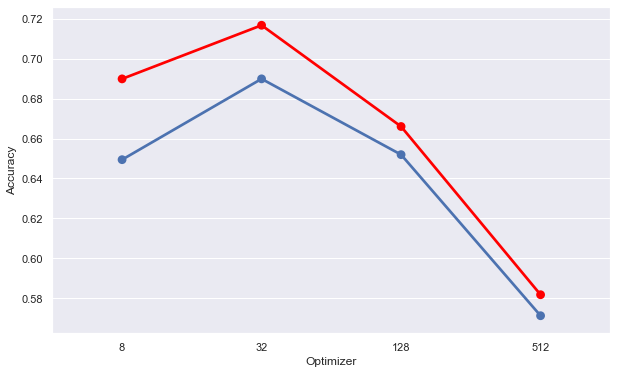

In [3]:
#Plot accuracy

# create two axes
fig = plt.figure(figsize=(10,6) )


# first subplot 
ax = sns.pointplot(x="Batchsize", y="Training", data=accuracy)
 

# second subplot
ax2= sns.pointplot(x="Batchsize", y="Test", data=accuracy, color= 'red')
#handling legends
ax.set(xlabel='Optimizer', ylabel='Accuracy')






Analysing Optimizer

In [4]:
#initialise empty dataframes
accuracy2 = pd.DataFrame(columns=['Optimizer', 'Training', 'Test'])
print(accuracy2)
null=  []
adam = []
radam = []
lrs = []

files= []
# folders = []
#habe ich oben schon
#Get all folders of Cifar10
# for r, d, f in os.walk(os.getcwd()+ "\logs"):
#     for folder in d:
#         name = str(folder)
#         if name.endswith('Cifar10'):     
#             folders.append(os.path.join(r, folder))


# go through Cifar10
for fila in folders:
    
    direction = str(fila)
    inhalt = os.listdir(fila) #each file in each folder

    #seperate the csv files according to Optimizer
    for file in inhalt:
    
        name = str(file)
       
        if ('id0' in name):
           
            null.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenatednull = pd.concat(null, ignore_index=True)

        if ('idADAM' in name):

            adam.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenatedadam = pd.concat(adam, ignore_index=True)
            
        if ('idRADAM' in name):

            radam.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenatedradam = pd.concat(adam, ignore_index=True)

        if ('idLRS' in name):

            lrs.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenatedlrs = pd.concat(lrs, ignore_index=True)

        
        
  
        
        
#add the gained information in the accuracy dataframe        
addnull = pd.DataFrame([['Gradient Decent',df_concatenatednull['training_accuracy'].mean(),df_concatenatednull['test_accuracy'].mean()]], columns=['Optimizer', 'Training', 'Test'])
accuracy2 =accuracy2.append(addnull, ignore_index=True)

addadam = pd.DataFrame([['ADAM',df_concatenatedadam['training_accuracy'].mean(),df_concatenatedadam['test_accuracy'].mean()]], columns=['Optimizer', 'Training', 'Test'])
accuracy2 =accuracy2.append(addadam, ignore_index=True)

addradam = pd.DataFrame([['Rectified ADAM',df_concatenatedradam['training_accuracy'].mean(),df_concatenatedradam['test_accuracy'].mean()]], columns=['Optimizer', 'Training', 'Test'])
accuracy2 =accuracy2.append(addradam, ignore_index=True)

addlrs = pd.DataFrame([['Gradient Decent mit Learning Rate Decay',df_concatenatedlrs['training_accuracy'].mean(),df_concatenatedlrs['test_accuracy'].mean()]], columns=['Optimizer', 'Training', 'Test'])
accuracy2 =accuracy2.append(addlrs, ignore_index=True)

print(accuracy2)


Empty DataFrame
Columns: [Optimizer, Training, Test]
Index: []
                                 Optimizer  Training      Test
0                          Gradient Decent  0.561748  0.599945
1                                     ADAM  0.683022  0.693481
2                           Rectified ADAM  0.683022  0.693481
3  Gradient Decent mit Learning Rate Decay  0.646749  0.676387


No handles with labels found to put in legend.


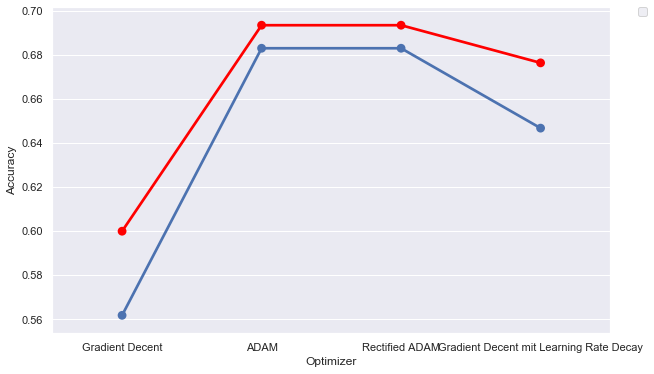

In [12]:
#Plot accuracy

# create two axes
fig = plt.figure(figsize=(10,6) )


# first subplot 
ax = sns.pointplot(x="Optimizer", y="Training", data=accuracy2)
 

# second subplot
ax2= sns.pointplot(x="Optimizer", y="Test", data=accuracy2, color= 'red')#
#handling legends
ax.set(xlabel='Optimizer', ylabel='Accuracy')



Combined visualisation


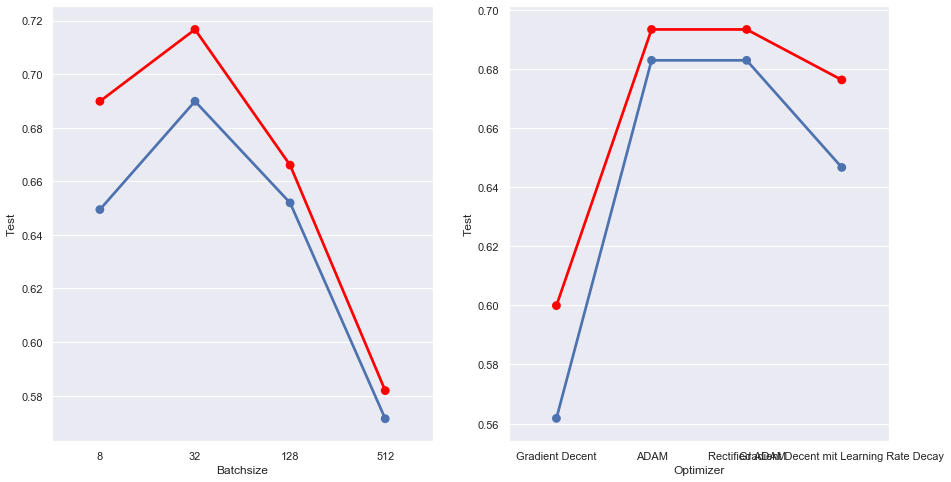

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,8))
sns.pointplot(x="Batchsize", y="Training", data=accuracy, ax = ax1)
sns.pointplot(x="Batchsize", y="Test", data=accuracy, color= 'red', ax= ax1)

sns.pointplot(x="Optimizer", y="Training", data=accuracy2, ax= ax2)
sns.pointplot(x="Optimizer", y="Test", data=accuracy2, color= 'red', ax= ax2)

